## Вступление

**Описание**

Заказчик этого исследования — сеть отелей «Как в гостях». 
Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.
Чтобы решить эту проблему,  нам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

**Бизнес-метрика и другие данные**

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. 
В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 
Стоимость номеров отеля:
* категория A: за ночь — 1 000, разовое обслуживание — 400;
* категория B: за ночь — 800, разовое обслуживание — 350;
* категория C: за ночь — 600, разовое обслуживание — 350;
* категория D: за ночь — 550, разовое обслуживание — 150;
* категория E: за ночь — 500, разовое обслуживание — 150;
* категория F: за ночь — 450, разовое обслуживание — 150;
* категория G: за ночь — 350, разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.
На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

**Цель:** 

**План действий:**

1. Открыть файлы с данными

2. Осуществить предобработку и исследовательский анализ данных. Проверить данные и откорректировать их, если потребуется. Провести исследовательский анализ представленных данных. Описать найденные особенности: пропуски, выбросы.

3. Вычислить бизнес-метрику. Оцените прибыль отеля без внедрения депозитов.

4. Разработка модели ML. Обучить разные модели и оценить их качество кросс-валидацией. Выбрать лучшую модель и проверить её на тестовой выборке. Описать выводы. Выбрать метрику для обучения. Оценить прибыль, которую принесёт выбранная модель за год.

5. Выявить признаки «ненадёжного» клиента. На основе исследовательского анализа данных описать клиента, склонного к отказу от брони.

6. Написать общий вывод. Описать модель, которая решает задачу с наибольшей выгодой для бизнеса. Дать бизнесу рекомендации по результатам проделанной работы.

**Описание данных**

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:

id — номер записи;

adults — количество взрослых постояльцев;

arrival_date_year — год заезда;

arrival_date_month — месяц заезда;

arrival_date_week_number — неделя заезда;

arrival_date_day_of_month — день заезда;

babies — количество младенцев;

booking_changes — количество изменений параметров заказа;

children — количество детей от 3 до 14 лет;

country — гражданство постояльца;

customer_type — тип заказчика:

Contract — договор с юридическим лицом;

Group — групповой заезд;

Transient — не связано с договором или групповым заездом;

Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.

days_in_waiting_list — сколько дней заказ ожидал подтверждения;

distribution_channel — канал дистрибуции заказа;

is_canceled — отмена заказа;

is_repeated_guest — признак того, что гость бронирует номер второй раз;

lead_time — количество дней между датой бронирования и датой прибытия;

meal — опции заказа:

SC — нет дополнительных опций;

BB — включён завтрак;

HB — включён завтрак и обед;

FB — включён завтрак, обед и ужин.

previous_bookings_not_canceled — количество подтверждённых заказов у клиента;

previous_cancellations — количество отменённых заказов у клиента;

required_car_parking_spaces — необходимость места для автомобиля;

reserved_room_type — тип забронированной комнаты;

stays_in_weekend_nights — количество ночей в выходные дни;

stays_in_week_nights — количество ночей в будние дни;

total_nights — общее количество ночей;

total_of_special_requests — количество специальных отметок.

## 1.Загрузка и подготовка данных

In [1]:
# Добавляем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.utils import shuffle

In [2]:
# Объявим константу ввиде словаря со стоимостью жилья в зависимости от класса и с учетом расходов на уборку этого номера
CLASSES_PER_SERVICE = {'A': (1000, 400), 
                       'B': (800, 350),
                       'C': (600, 350),
                       'D': (550, 150),
                       'E': (500, 150),
                       'F': (450, 150),
                       'G': (350, 150)}

In [3]:
# открываем и чекаем исходный датасет
try:
    data_train = pd.read_csv('hotel_train.csv')
    data_test = pd.read_csv('hotel_test.csv')
except FileNotFoundError:
    data_train = pd.read_csv('/datasets/hotel_train.csv')
    data_test = pd.read_csv('/datasets/hotel_test.csv')

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

В целом, видим, что данные на первый взгляд хорошие, нигде явных пропусков нет. Но на вид, есть признаки тип данных, которых стоит заменить.

## 2. Предобработка и исследовательский анализ данных

In [6]:
print(data_train['lead_time'].unique()[:10])
print(data_test['lead_time'].unique()[:10])

[ 7. 14.  0.  9. 85. 75. 23. 18. 68. 37.]
[ 74.  62.  71. 172.  52. 143.  21.  89.  48.  31.]


Значения в данном признаке в обоих дф выглядят как целые, но сохранены как вещественные. Но думаю погоды не сделает, если не заменим тип данных на целый.

In [7]:
print(data_train['arrival_date_month'].unique())
print(data_test['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Вот с этим признаком уже стоит поработать, так как все остальные признаки с датой записаны целым числом, а месяца - строковым типом данных. 

In [8]:
data_train['arrival_date_month'].head()

0    July
1    July
2    July
3    July
4    July
Name: arrival_date_month, dtype: object

In [9]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
         'August', 'September', 'October', 'November', 'December']

data_train['arrival_date_month'] = data_train['arrival_date_month'].apply(lambda x: months.index(x) + 1)
data_test['arrival_date_month'] = data_test['arrival_date_month'].apply(lambda x: months.index(x) + 1)
data_train['arrival_date_month'].head()

0    7
1    7
2    7
3    7
4    7
Name: arrival_date_month, dtype: int64

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  int64  
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

Преобразовали все месяца из строкового типа в числовой.

У признаков  stays_in_weekend_nights, stays_in_week_nights - все гуд с типом данных, у adults, children - тип данных дробный тоже, а все значения по факту целые. Но думаю тоже не критично не заменять тип данных на целый.

In [11]:
print(data_train['babies'].unique())
print(data_test['babies'].unique())

[ 0.  1.  2. 10.  9.]
[0. 1. 2.]


С признаком babies у data_train не понятно, что делать. Этот признак показывает количество младенцев. Насколько цифры в 9 и 10 младенцев реальны?

In [12]:
data_train['babies'].value_counts()

0.0     64777
1.0       447
2.0         3
10.0        1
9.0         1
Name: babies, dtype: int64

In [13]:
64777 / 65229

0.9930705667724479

Здесь уже видим, что это похоже на "выброс" так как из 65к значений только 1 раз встречается количество детей равный 10 и 1 раз в количестве 9. В целом, мы могли бы приплюсовать значение в 9 и 10 к катеогрии 0, потому что она занимает 99% всего датасета, и думаю 2 значения опять же погоды не изменят, но и в то же время при обучении модели могут начать учитываться ложные данные для значения "0 младенцев". Поэтому думаю ничего страшного, если мы удалим эти 2 строки.

In [14]:
data_train = data_train[data_train['babies'] < 9]

In [15]:
print(data_train['meal'].unique())
print(data_test['meal'].unique())

['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']
['BB       ' 'HB       ' 'SC' 'FB       ' 'SC       ']


В признаке meal видим, что, во-первых, почти в каждом значении есть лишние пробелы, а, во-вторых, есть значения 'SC       ' и 'SC', что по сути являются одинаковыми, но из-за пробелов записаны, как разные - исправим.

In [16]:
data_train['meal'] = data_train['meal'].apply(lambda x: x.strip())
data_test['meal'] = data_test['meal'].apply(lambda x: x.strip())
data_train['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

Все отлично, значения исправлены и теперь у нас нет по разному "дублирующихся категорий"

У признаков: country, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled все гуд с типом данных и значениями

In [17]:
data_train['reserved_room_type'].unique()

array(['A               ', 'C               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'B               '], dtype=object)

Здесь видим, что тоже надо бы поубирать лишние пробелы

In [18]:
data_train['reserved_room_type'] = data_train['reserved_room_type'].apply(lambda x: x.strip())
data_test['reserved_room_type'] = data_test['reserved_room_type'].apply(lambda x: x.strip())
data_train['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'B'], dtype=object)

Все отлично заменилось

У признаков:  booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests, total_nights, customer_type все гуд с типом данных и значениями

In [19]:
data_train['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [20]:
to_int = ['lead_time', 'adults', 'children', 'babies']
data_train[to_int] = data_train[to_int].astype('int')
data_test[to_int] = data_test[to_int].astype('int')


Изучим описательные статистики всех числовых переменных

In [21]:
print(data_train.describe())
print('----------------------')
print(data_test.describe())

                 id   is_canceled     lead_time  arrival_date_year  \
count  65227.000000  65227.000000  65227.000000       65227.000000   
mean   43544.011345      0.368620     96.340135        2015.719027   
std    25615.123796      0.482434     96.128157           0.449478   
min        0.000000      0.000000      0.000000        2015.000000   
25%    19107.000000      0.000000     17.000000        2015.000000   
50%    40554.000000      0.000000     64.000000        2016.000000   
75%    67414.500000      1.000000    151.000000        2016.000000   
max    84121.000000      1.000000    374.000000        2016.000000   

       arrival_date_month  arrival_date_week_number  \
count        65227.000000              65227.000000   
mean             7.450427                 31.340043   
std              3.099096                 13.463709   
min              1.000000                  1.000000   
25%              5.000000                 21.000000   
50%              8.000000              

In [22]:
data_train['reserved_room_type'].value_counts()

A    50500
D     9386
E     2448
F     1213
B      860
G      592
C      228
Name: reserved_room_type, dtype: int64

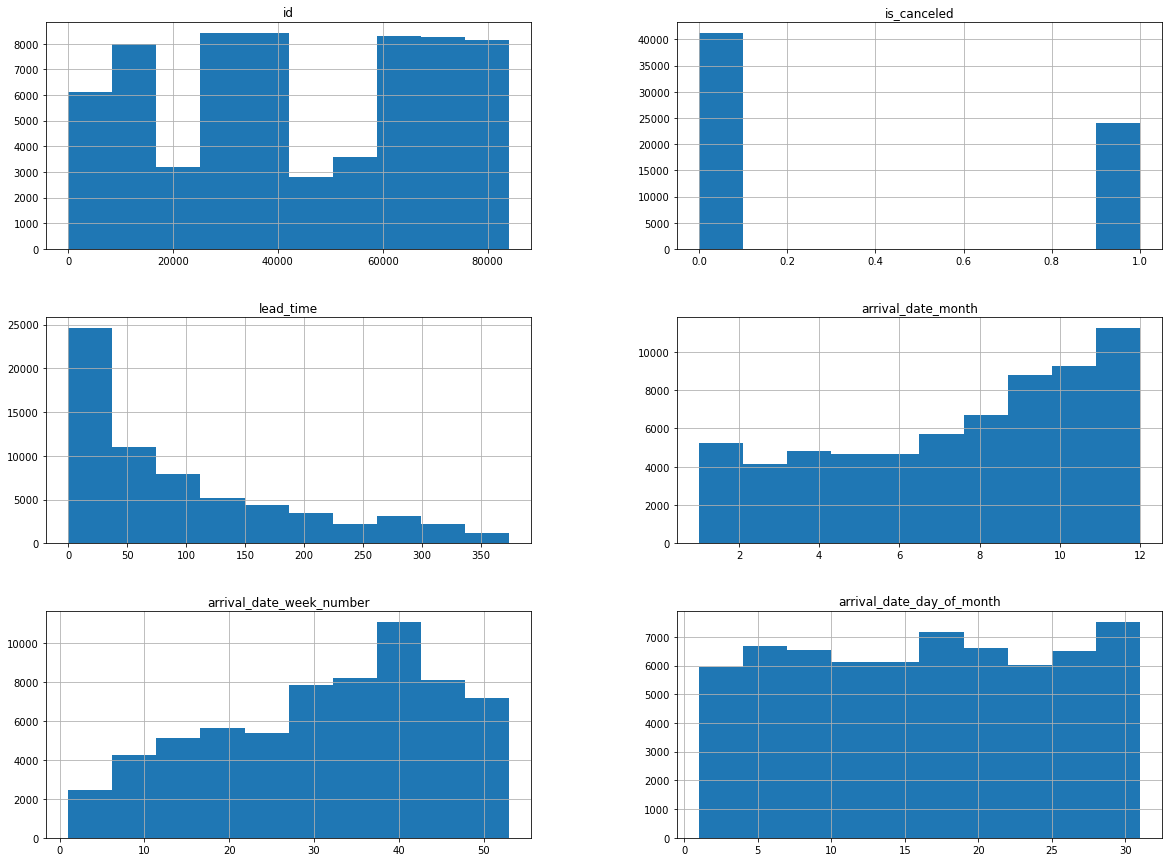

In [23]:
data_train.drop(['is_repeated_guest', 'required_car_parking_spaces',
                'adults', 'children', 'babies', 'stays_in_weekend_nights',
                'stays_in_week_nights', 'previous_cancellations',
                'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                'total_of_special_requests', 'total_nights', 'arrival_date_year'], axis=1).hist(bins=10, figsize=(20,15))
plt.show()

In [24]:
data_train['adults'].value_counts().unique()

array([48979, 13211,  2858,   166,    13])

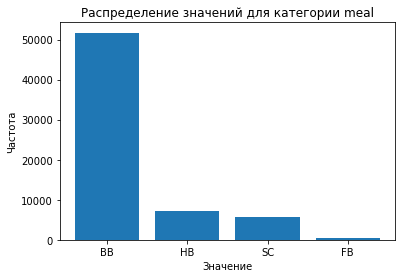

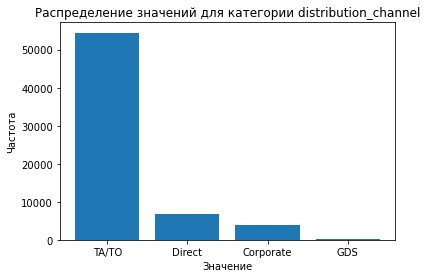

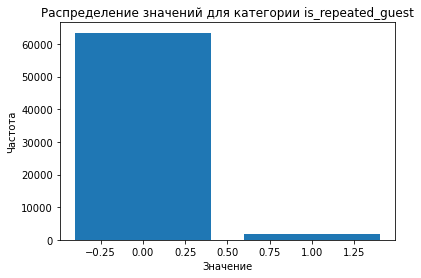

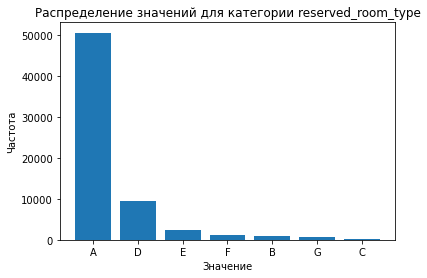

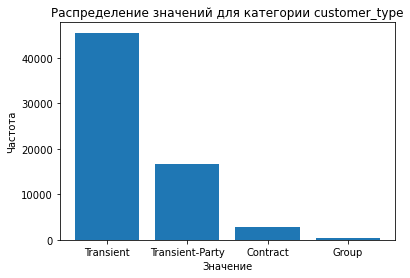

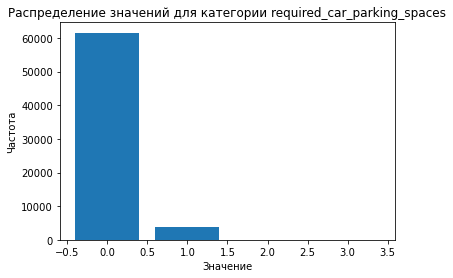

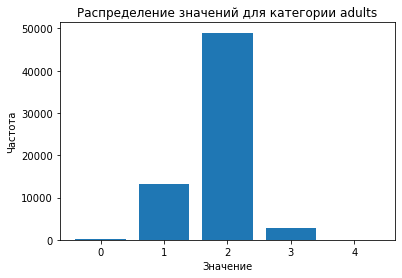

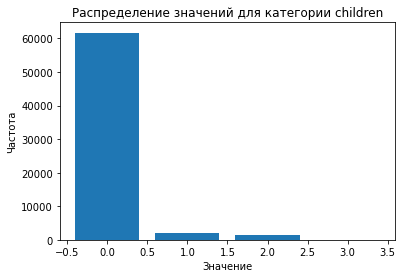

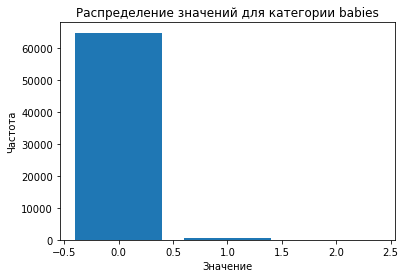

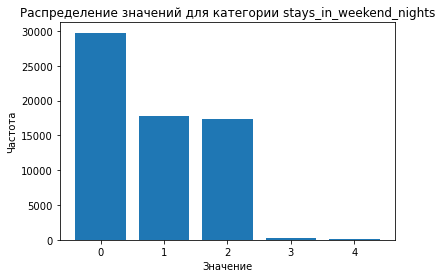

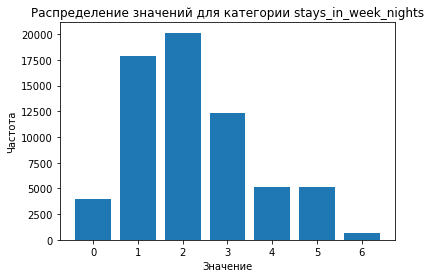

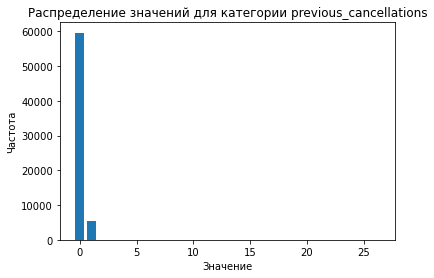

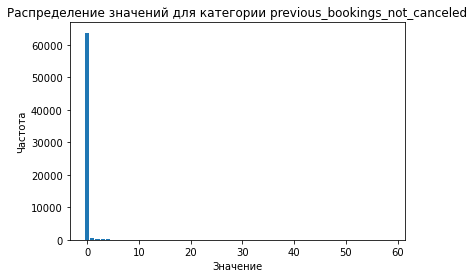

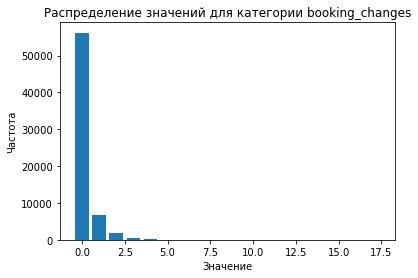

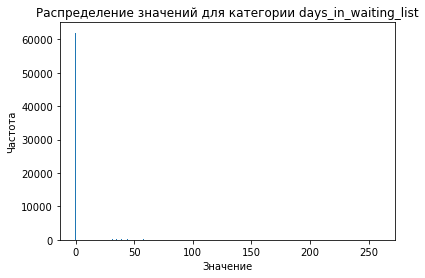

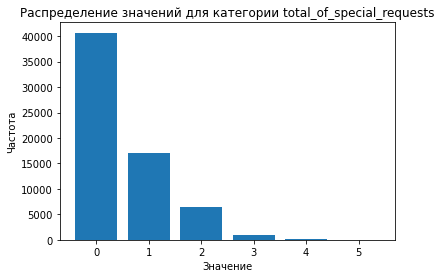

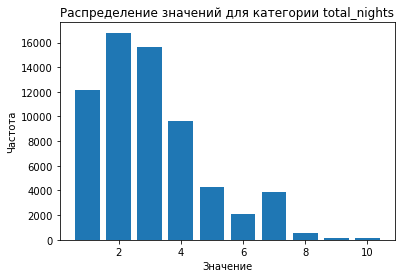

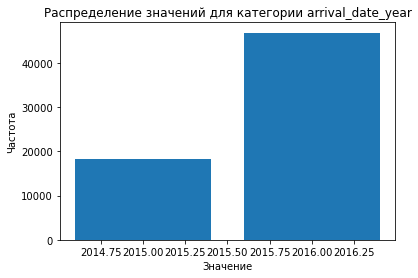

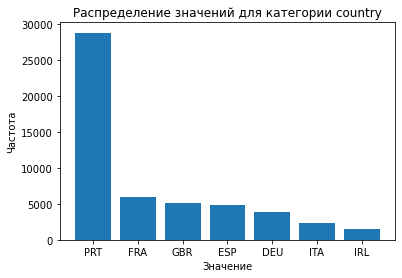

In [25]:
cats = ['meal', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'customer_type', 'required_car_parking_spaces', 'adults', 'children', 'babies',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'total_nights', 'arrival_date_year']

for cat in cats:
    d = data_train[cat].value_counts()
    plt.bar(d.index, d.values)
    
    # настраиваем оси
    plt.xlabel("Значение")
    plt.ylabel("Частота")
    plt.title("Распределение значений для категории {}".format(cat))
    
    # показываем диаграмму
    plt.show()

d = data_train['country'].value_counts().head(7)
plt.bar(d.index, d.values)
    
    # настраиваем оси
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Распределение значений для категории {}".format('country'))
    
    # показываем диаграмму
plt.show()



По полученным гистограммам преимущественно количественных признаков видим, что:
- Есть большой пик у переменной lead_time - "количество дней между датой бронирования и датой прибытия" пик приходится на 0-30 дней, то есть в этом отеле люди чаще бронируют жилье за месяц и меньше до момента прибытия. 
- Чаще всего в отель приезжают в период сентябрь - декабрь. В декабре больше всего.
- Но если смотреть в разрезе недель, то пик приходится на 39-41 недели. А вот по дням практически во все дни примерно одинаковое распределение.
- подтверждение заказа происходило практически сразу.
- в автомобиле чаще всего не нуждались

Категориальные признаки:
- Очень часто заказывают номер со включенным завтраком
- Очень часто посетителями оказываются посетители TA/TO по каналу дистрибуции заказа
- У нас датасет практически полностью из "новых" гостей
- Очень часто выбирают номер класса "А"
- Чаще всего тип заказчика - Transient
- Очень часто в парковке не нуждаются
- Процентов 80 - остаются пары (то есть 2 человека). И практически всегда без детей и младенцев.
- Так же судя по всему люди стараются не оставаться на ночь в выходные дни. А так же стараются остановиться в ночь на вск-вт.
- Практически все гости останавливались в этом отеле впервые. И опять же в большинстве своем ранее не отказывали в бронирвоании.
- количество изменений параметров заказа минимально
- количество специальных отметок чаще - 0
- общее количество ночей чаще 2-3 ночи
- Заселялись в освновном в 2016 году
- Чаще всего останалваиются люди из Португалии, затем француцы, англичане,испанцы, немцы и так далее

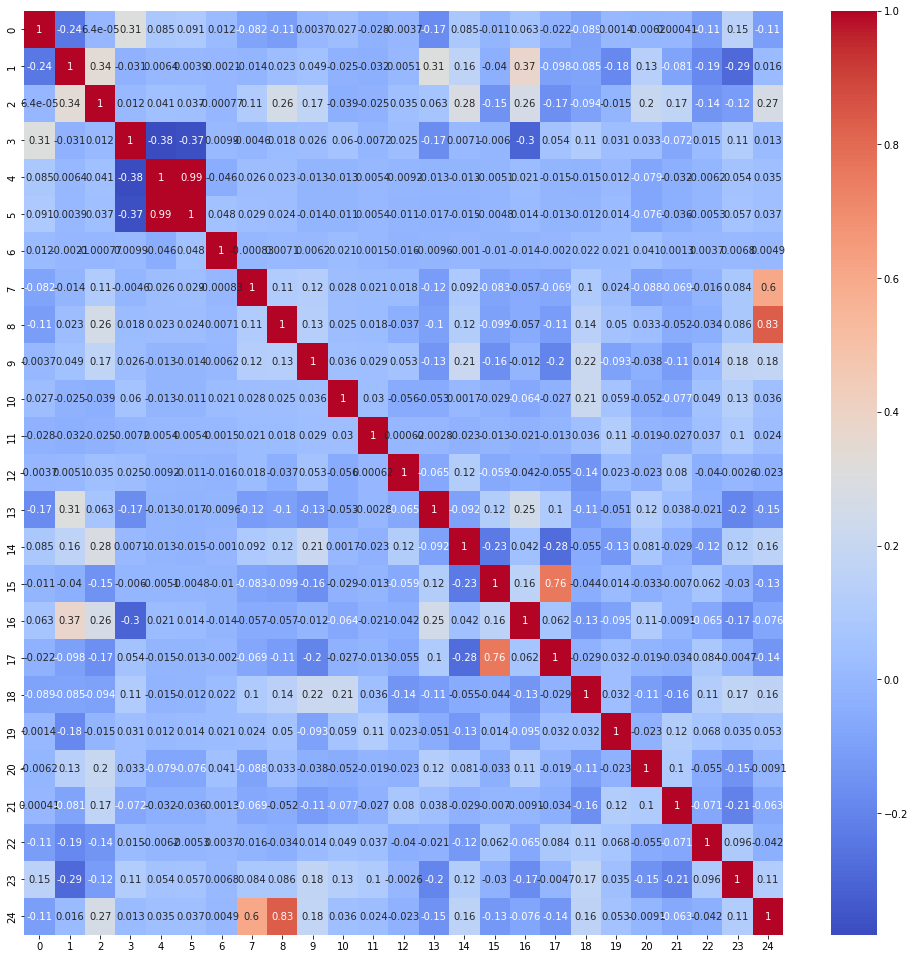

In [26]:
corr_matrix, _ = spearmanr(data_train)
fig, ax = plt.subplots(figsize=(17, 17))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Что мы видим:
1. Супер сильно коррелируют arrival_date_month и arrival_date_week_number, что в целом логично
2. Довольно сильно коррелируют stays_in_week_nights(колво ночей в будние) и total_nights(общее колво ночей), а также stays_in_weekend_nights (колво ночей в выходные) и total_nights(общее колво ночей) тоже коррелируют.
3. Так же довольно сильно коррелируют is_repeated_guest (признак того что гость бронирует уже во второй раз) и previous_bookings_not_canceled(количество подтверждённых заказов у клиента) - что тоже вполне логичная корреляция

## 3. Оценка прибыли отеля без внедрения депозитов.

Нам нужно посчитать и оценить прибыль без внедрения депозитов на тестовой выборке. Для этого нам понадобятся новые столбцы для удобства расчетов.

In [27]:
# столбец со стоимостью номера в зависимости от его класса
data_test['room_cost'] = data_test['reserved_room_type'].apply(lambda x: CLASSES_PER_SERVICE[x][0])
# data_test['room_cost'].value_counts()


# столбец с сезонным коэффициентом
def abc(month):
    if (str(month) in '34591011') and (month != 1):
        return 1.2
    elif str(month) in '678':
        return 1.4
    else:
        return 1
    
data_test['season_coefficient'] = data_test['arrival_date_month'].apply(abc)
# data_test['season_coefficient'].value_counts()

# столбец со стоимостью уборки
data_test['room_service_cost'] = data_test['reserved_room_type'].apply(lambda x: CLASSES_PER_SERVICE[x][1])
# data_test['room_service_cost'].value_counts()

# столбец с количеством уборок в завиисмости от количества ночей
# за "долгое проживание" взял 3 ночи. То есть если человек остановился от 1 до 3 ночей то столько же и уборок надо сделать
# если остановился больше чем на 3, то это каждая вторая ночь + 1
data_test['num_cleaning'] = data_test['total_nights'].apply(lambda x: x // 2 + 1 if x > 3 else x)
# data_test['num_cleaning'].value_counts()

In [28]:
def get_profit(row):
    if not row['is_canceled']:
        revenue = row['total_nights'] * row['room_cost'] * row['season_coefficient']
        losses = row['room_service_cost'] * row['num_cleaning']
        return revenue - losses
    return  (row['room_service_cost'] + row['room_cost'] * row['season_coefficient']) * -1 

data_test['profit'] = data_test.apply(get_profit, axis=1)

In [29]:
print(data_test['profit'].describe())
print(data_test['profit'].sum())
total = data_test['profit'].sum()

count    32412.000000
mean       959.254906
std       2363.704487
min      -1800.000000
25%      -1400.000000
50%       1000.000000
75%       2400.000000
max      11600.000000
Name: profit, dtype: float64
31091370.0


Средняя прибыль составляет 984р, а медианная 1000р

## 4. Разработка модели ML

### Уберем лишнюю переменную - 'id'

In [30]:
# data_train = data_train.drop('id', axis=1)
# data_test = data_test.drop('id', axis=1)

### У нас есть обучащая и тестовые выборки. Создадим из обучающей еще и валидационную. В соотношении 4:1

In [31]:
# Разделим выборку на валидационную и тестовую.
data_train, data_valid = train_test_split(data_train, test_size=0.2, random_state=12345, stratify=data_train['is_canceled'])

#  Определим зависимую и независимые переменные для выделенных датасетов
X_train = data_train.drop(['is_canceled', 'id'], axis=1)
Y_train = data_train['is_canceled']
X_valid = data_valid.drop(['is_canceled', 'id'], axis=1)
Y_valid = data_valid['is_canceled']
X_test = data_test.drop(['is_canceled', 'room_cost', 'season_coefficient',
                         'room_service_cost', 'num_cleaning', 'profit', 'id'], axis=1)
Y_test = data_test['is_canceled']

# Создадим словарь на будущее: модель - качество
sl = {'Модель': ['Кросс-валидация', 'F1']}

### Перекодируем данные методом OHE

In [32]:
# Выделим категориальнеы признаки
features_categorical = ['country', 'customer_type', 'distribution_channel', 'meal', 'reserved_room_type']

# ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
# X_train = ohe.fit_transform(X_train[features_categirical])
# X_valid = ohe.transform(X_valid[features_categirical])
# X_test = ohe.transform(X_test[features_categirical])

ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train[features_categorical])
X_valid_cat = ohe.transform(X_valid[features_categorical])
X_test_cat = ohe.transform(X_test[features_categorical])

/Users/julianan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/julianan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/julianan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [33]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52181 entries, 508 to 24246
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              52181 non-null  int64 
 1   is_canceled                     52181 non-null  int64 
 2   lead_time                       52181 non-null  int64 
 3   arrival_date_year               52181 non-null  int64 
 4   arrival_date_month              52181 non-null  int64 
 5   arrival_date_week_number        52181 non-null  int64 
 6   arrival_date_day_of_month       52181 non-null  int64 
 7   stays_in_weekend_nights         52181 non-null  int64 
 8   stays_in_week_nights            52181 non-null  int64 
 9   adults                          52181 non-null  int64 
 10  children                        52181 non-null  int64 
 11  babies                          52181 non-null  int64 
 12  meal                            52181 non-nu

### Стандартизируем количественные данные

In [34]:
numeric_features = ['lead_time', 'adults', 'children', 'babies', 'stays_in_weekend_nights',
                    'stays_in_week_nights', 'previous_cancellations', 'previous_bookings_not_canceled',
                    'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces',
                    'total_of_special_requests', 'total_nights']

# scaler = StandardScaler()
# scaler.fit(X_train[numeric_features])

# X_train[numeric_features] = scaler.transform(X_train[numeric_features])
# X_valid[numeric_features] = scaler.transform(X_valid[numeric_features])
# X_test[numeric_features] = scaler.transform(X_test[numeric_features])

scaler = StandardScaler()
scaler.fit(X_train[numeric_features])

X_train_num = scaler.transform(X_train[numeric_features])
X_valid_num = scaler.transform(X_valid[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train = np.hstack((X_train_num, X_train_cat))
X_valid = np.hstack((X_valid_num, X_valid_cat))
X_test = np.hstack((X_test_num, X_test_cat))


### Построение изученных моделей для классификации. И оценка их качества кросс-валидацией

Изучим баланс классов целевого признака

In [35]:
data_train['is_canceled'].value_counts() / data_train.shape[0]

0    0.631379
1    0.368621
Name: is_canceled, dtype: float64

Видим, что классы у нас были не сбалансированы, поэтому попробуем их все же сбалансирвоать методом upsampling. То есть увеличим частоту положительных ответов на равне с отрицательными. У нас уже есть разделенные выборки. Осталось написать алгоритм для повышения частоты положительных. Так как видим, что 0-ей в 2 раза больше чем 1, то и увеличивать выборку будем в 2 раза

In [36]:
def upsample(X_train, Y_train, repeat):
    X_zeros = X_train[Y_train == 0]
    X_ones = X_train[Y_train == 1]
    Y_zeros = Y_train[Y_train == 0]
    Y_ones = Y_train[Y_train == 1]

    #repeat = 10
    X_upsampled = pd.concat([pd.DataFrame(X_zeros)] + [pd.DataFrame(X_ones)] * repeat)
    Y_upsampled = pd.concat([Y_zeros] + [Y_ones] * repeat)
    
# < добавьте перемешивание >
    X_upsampled, Y_upsampled = shuffle(X_upsampled, Y_upsampled, random_state=12345)
    return X_upsampled, Y_upsampled
    
X_upsampled, Y_upsampled = upsample(X_train, Y_train, 2)

print(X_train.shape)
print(Y_train.shape)
print(X_upsampled.shape)
print(Y_upsampled.shape)


(52181, 175)
(52181,)
(71416, 175)
(71416,)


Видим, что искусственное увеличение класса прошло успешно. Количество независимых и зависимой переменной одинаковп увеличилось. Было 52к строк - стало 71к.

Для оценки качества обученных моделей выберем метрику F1. Данная метрика измеряет, насколько точно модель может классифицировать примеры, и при этом учитывает как полноту, так и точность.

В нашей задаче определения отмены бронирования "отмененных бронирований" может быть меньше, чем положительных примеров "не отмененных бронирований" и наоборот. Это означает, что метрики, основанные только на точности или только на полноте, могут давать неправильное представление о качестве модели. Метрика F1 учитывает обе метрики, поэтому ее можно считать хорошим выбором для оценки качества модели в данном случае.

#### Дерево решений

In [37]:
# Создадм объект решающего дерева
tree = DecisionTreeClassifier()

# Обозначим значения гиперпараметров
param_grid = {'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 5)}

grid = GridSearchCV(tree, param_grid, cv=5, scoring='f1')
grid.fit(X_train, Y_train)

print("Лучшие параметры ", grid.best_params_)
print("Лучшее значение кросс-валидации ", grid.best_score_)

valid_f1 = grid.score(X_valid, Y_valid)
print("F1 на лучших параметрах и валидационной выборке ", valid_f1)

sl['Decision Tree'] = [grid.best_score_, valid_f1]

Лучшие параметры  {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 8}
Лучшее значение кросс-валидации  0.7390679606162123
F1 на лучших параметрах и валидационной выборке  0.7328279883381924


#### Случайный лес

In [38]:
# # Создадм объект решающего дерева
# forest = RandomForestClassifier()

# # Обозначим значения гиперпараметров
# param_grid = {'n_estimators': np.arange(10,51,10),
#               'max_depth': np.arange(1, 10),
#               'min_samples_split': np.arange(2, 5),
#               'min_samples_leaf': np.arange(1, 5)}

# grid = GridSearchCV(forest, param_grid, cv=5, scoring='f1')
# grid.fit(X_train, Y_train)

# print("Best parameters: ", grid.best_params_)
# print("Best cross-validation score: ", grid.best_score_)

# test_accuracy = grid.score(X_valid, Y_valid)
# print("Test set accuracy with best parameters: ", test_accuracy)

# sl['Random Forest'] = [grid.best_params_, grid.best_score_, test_accuracy]

In [39]:
# Создадм объект решающего дерева
forest = RandomForestClassifier()

# Обозначим диапазон значений гиперпараметров
param_dist = {'n_estimators': randint(10, 51),
              'max_depth': randint(1, 10),
              'min_samples_split': randint(2, 5),
              'min_samples_leaf': randint(1, 5)}

random_search = RandomizedSearchCV(forest, param_distributions=param_dist, cv=5, scoring='f1', n_iter=20)
random_search.fit(X_train, Y_train)

print("Лучшие параметры ", random_search.best_params_)
print("Лучшее значение кросс-валидации ", random_search.best_score_)

valid_f1 = random_search.score(X_valid, Y_valid)
print("F1 на лучших параметрах и валидационной выборке ", valid_f1)

sl['Random Forest'] = [random_search.best_score_, valid_f1]


Лучшие параметры  {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 39}
Лучшее значение кросс-валидации  0.6687991863797837
F1 на лучших параметрах и валидационной выборке  0.6905345757724374


#### Логистическая регрессия

In [40]:
# Создаем модель логистической регрессии с дефолтными параметрами
logres = LogisticRegression(random_state=12345)
logres.fit(X_train, Y_train)

f1_scores = cross_val_score(logres, X_train, Y_train, cv=5, scoring='f1')
print('F1 scores:', f1_scores)
print('Max F1 score:', max(f1_scores))

# Оцениваем качество модели на валидационной выборке
valid_f1 = logres.score(X_valid, Y_valid)
print("F1 на валидационной выборке ", valid_f1)

sl['Logistic Regression'] = [max(f1_scores), valid_f1]

/Users/julianan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/julianan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

F1 scores: [0.71138444 0.70404624 0.70415648 0.71313131 0.70936383]
Max F1 score: 0.7131313131313131
F1 на валидационной выборке  0.800475241453319


/Users/julianan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Определяем победителя

In [41]:
sl

{'Модель': ['Кросс-валидация', 'F1'],
 'Decision Tree': [0.7390679606162123, 0.7328279883381924],
 'Random Forest': [0.6687991863797837, 0.6905345757724374],
 'Logistic Regression': [0.7131313131313131, 0.800475241453319]}

In [42]:
max_key = max(list(sl.items())[1:], key=lambda x: x[1][0])[0]
print(max_key)
print('Кросс-валидация  = ', sl[max_key][0])


Decision Tree
Кросс-валидация  =  0.7390679606162123


In [43]:
max_key = max(list(sl.items())[1:], key=lambda x: x[1][1])[0]
print(max_key)
print('F1 =', sl[max_key][1])

Logistic Regression
F1 = 0.800475241453319


In [44]:
print(pd.DataFrame(sl))

            Модель  Decision Tree  Random Forest  Logistic Regression
0  Кросс-валидация       0.739068       0.668799             0.713131
1               F1       0.732828       0.690535             0.800475


Лучшая модель по значению кроссвалидации по метрике качества F1 получилось - дерево решений, а по метркие Accuracy - логистическая регрессия. Выберем логистическую регерссию и посомтрим теперь на нее на тестовой выборке.

In [45]:
# Оцениваем качество модели на тестовой выборке
valid_accuracy_test = logres.score(X_test, Y_test)
print("Accuracy на тестовой выборке ", valid_accuracy_test)
pred_test = logres.predict(X_test)
f1 = f1_score(Y_test, pred_test)
print("f1_score на тестовой выборке:", f1)

Accuracy на тестовой выборке  0.7649018881895594
f1_score на тестовой выборке: 0.6409724839803996


In [46]:
print(pred_test)

[1 0 0 ... 0 0 0]


In [47]:
data_test['predictions'] = pred_test
#data_test.head()

#### Оценка прибыли, которую принесёт выбранная модель за год.

In [54]:
# напишем функцию для расчета общей прибыли с действующей моделью по депозитам

def get_profit2(row):
    revenue = row['total_nights'] * row['room_cost'] * row['season_coefficient']
    losses = row['room_service_cost'] * row['num_cleaning']
    if row['is_canceled'] == 1 and row['predictions'] == 0:  # 1. человек не приехал, модель ошиблась
        return -(row['room_cost'] * row['season_coefficient'] + row['room_service_cost'])
    elif row['is_canceled'] == 1 and row['predictions'] == 1:  # 2. человек не приехал, модель предсказала правильно
        return - 0.2 * (row['room_cost'] * row['season_coefficient']+ row['room_service_cost'])
    elif row['is_canceled'] == 0 and row['predictions'] == 1:  # 3. человек приехал, модель ошиблась
        return revenue - losses
    elif row['is_canceled'] == 0 and row['predictions'] == 0:  # 4. человек приехал, модель предсказала правильно
        return revenue - losses
    
    
data_test['profit_2'] = data_test.apply(get_profit2, axis=1)


In [55]:
# посмотрим примерное долевое соотношение 4х признаков. 
print(round(data_test[(data_test['is_canceled'] == 1) & (data_test['predictions'] == 0)]['id'].count()
      / data_test.shape[0], 2))
print(round(data_test[(data_test['is_canceled'] == 1) & (data_test['predictions'] == 1)]['id'].count()
      / data_test.shape[0], 2))
print(round(data_test[(data_test['is_canceled'] == 0) & (data_test['predictions'] == 1)]['id'].count()
      / data_test.shape[0], 2))
print(round(data_test[(data_test['is_canceled'] == 0) & (data_test['predictions'] == 0)]['id'].count()
      / data_test.shape[0], 2))

0.18
0.21
0.06
0.56


In [56]:
print(data_test['profit_2'].describe())
print(data_test['profit_2'].sum())
total_2 = data_test['profit_2'].sum()

count    32412.000000
mean      1209.171973
std       2138.973070
min      -1800.000000
25%       -320.000000
50%       1000.000000
75%       2400.000000
max      11600.000000
Name: profit_2, dtype: float64
39191682.0


In [57]:
print(total)
print(total_2)
print('Величина, на которую увеличится прибыль, если мы внедрим модель с депозитами', total_2 - total - 400000)

31091370.0
39191682.0
Велиина, на которую увеличится прибыль, если мы внедрим модель с депзитами 7700312.0


Микро вывод:
Наша модель предсказывает достаточно хорошо, но не идеально кончено. Но прибыль по сравнению с прибылью до внедрения депозитов, с учетом затрат на разработку модели - составляет 7млн 700тыс.

## 5. Выявление признаков «ненадёжного» клиента

In [52]:
canceled_bookings = data_test[data_test["predictions"] == 1]
cats = canceled_bookings.drop(['profit', 'profit_2', 'is_canceled', 'id',
                              'room_service_cost', 'num_cleaning', 'predictions'], axis=1).columns
for i in cats:
    print(i)
    print(canceled_bookings[i].value_counts().head())
    print('-' * 20)


lead_time
56     140
175    122
28     121
156    119
0      113
Name: lead_time, dtype: int64
--------------------
arrival_date_year
2017    8633
Name: arrival_date_year, dtype: int64
--------------------
arrival_date_month
5    1544
6    1541
4    1477
3    1012
7     974
Name: arrival_date_month, dtype: int64
--------------------
arrival_date_week_number
17    444
20    441
22    416
18    380
23    376
Name: arrival_date_week_number, dtype: int64
--------------------
arrival_date_day_of_month
15    468
26    403
8     364
2     330
1     329
Name: arrival_date_day_of_month, dtype: int64
--------------------
stays_in_weekend_nights
0    3706
2    2658
1    2224
4      26
3      19
Name: stays_in_weekend_nights, dtype: int64
--------------------
stays_in_week_nights
2    2603
3    2179
1    1824
5     806
4     708
Name: stays_in_week_nights, dtype: int64
--------------------
adults
2    6829
1    1234
3     536
0      29
4       5
Name: adults, dtype: int64
--------------------
chil

Признаки "ненадежного" клиента, чаще всего отменяют бронь те, кто:
- бронирует номер за 56 дней до прибытия
- кто бронирует в мае-июне
- на 17 и 20 неделях года
- кто бронирует 15 и 26 числа
- не бронирует на выходные дни (существенный признак)
- кто бронирует 2 будних дня 
- когда бронируют на 2х взрослых (существенный признак)
- бронирет номер без детей и младенцев (существенные признаки)
- со включенным завтраком (существенный признак)
- из страны PRT (существенный признак)
- у кого канал диструбуции заказов - TA/TO (существнный признак)
- кто впервые бронирует в этом отеле (существенный признак)
- у кого 0 отмененных ранее бронирований (существенный признак)
- у кого 0 ранее подтвержденных бронирований (существенный признак)
- бронирует номер класса А (существенный признак)
- кто ничего не меняет в параметрах заказа (существенный признак)
- кто не ждет подтверждения закааз (существенный признак)
- является заказчиком, не связаным с договором или групповым заездом( существенный признак)
- кто не нуждается в паркове (100% признак)
- нет никаких специальных отметок (существенный признак)
- бронирует отель на 3 ночи
- путешествует осенью или весной (судя по коэффициенту) (существенный признак)

In [53]:
X_train.shape

(52181, 175)

# Вывод

Что мы увидели из полученного анализа:
- самым популярным типом номера явлется номер класса А. 
- чаще всего в этом отеле бронируют номера в течении 30 дней до дня прибытия
- пик приходится на период с сентября по декабрь. А еще болье в 39-41 недели.
- основная аудитория это пары (2 человека), чаще стараются останавливаться в будние дни
- больше 90% это люди, что останавливались в отеле впервые
- очень редко, когда гостям нужны были автомобили
- чаще всего останавливаются на 2-3 ночи

Сильно положительно коррелируют значения общего количчества ночей, колво ночей в выходные, колво ночей в будние. И корреляция = 1 у признаков неделя заезда и месяц заезда, что вполне логично.

Прибыль отеля до внедрения депозита составила 31.893.060. Средняя прибыль составляет 984р, а медианная 1000р с человека

Были построены 3 модели. ПРоведена балансирвока класса. Из-за того что значений класса "1" было в 2 раза меньше, то приняли решение - методом upsapling сбалансирвоать классы. Проведена оценка качество кросс-валидацией по мтерике f1 и отдельно была рассчитана accuracy. По качеству на валидационной выборке наилучшей моделью оказалась - классическая логистическая регрессия. Используя данную модель были предсказаны значения для тестовой выборки. И рассчитана прибыль:

Прибыль отеля после внедрения депозита составила 39.191.682. Средняя прибыль составляет 1209, а медианная 1000 с человека.

По итогу, прибыль по сравнению с прибылью до внедрения депозитов, с учетом затрат на разработку модели (400тыс) увеличилась на 7млн 700тыс.

Так же были определены признаки "ненадежного" клиента, самые основные и существенные из них:
- не бронирует на выходные дни (существенный признак)
- когда бронируют на 2х взрослых (существенный признак)
- бронирет номер без детей и младенцев (существенные признаки)
- со включенным завтраком (существенный признак)
- из страны PRT (существенный признак)
- у кого канал диструбуции заказов - TA/TO (существнный признак)
- кто впервые бронирует в этом отеле (существенный признак)
- у кого 0 отмененных ранее бронирований (существенный признак)
- у кого 0 ранее подтвержденных бронирований (существенный признак)
- бронирует номер класса А (существенный признак)
- кто ничего не меняет в параметрах заказа (существенный признак)
- кто не ждет подтверждения закааз (существенный признак)
- является заказчиком, не связаным с договором или групповым заездом( существенный признак)
- кто не нуждается в паркове (100% признак)
- нет никаких специальных отметок (существенный признак)
- путешествует осенью или весной (судя по коэффициенту) (существенный признак)